In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
coordinate = pd.read_csv('csv/coordinates.csv')
coordinate

,name,lat,long
0,S05.512_E119.406,-5.512,119.406
1,S05.512_E119.433,-5.512,119.433
2,S05.512_E119.460,-5.512,119.460
3,S05.512_E119.487,-5.512,119.487
4,S05.512_E119.514,-5.512,119.514
...,...,...,...
139,S05.809_E119.595,-5.809,119.595
140,S05.809_E119.622,-5.809,119.622
141,S05.809_E119.649,-5.809,119.649
142,S05.809_E119.676,-5.809,119.676


In [3]:
lat = sorted(list(set(coordinate['lat'])), reverse=True)
long= sorted(list(set(coordinate['long'])))
lat_minor= [ lat + 0.027/2 for lat in lat][1:]
long_minor = [long + 0.027/2 for long in long][:-1]

row = ["1", "2",  "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
col = ["A", "B",  "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]

In [4]:
left = 119.406 - 0.027/2
right = 119.703 + 0.027/2
top = -5.512 + 0.027/2
bottom = -5.809 - 0.027/2

ul = (left,top)
lr = (right,bottom)

In [5]:
import gdal

gdal_data = gdal.Open("figure/south_sulawesi.tif")
gdal_band = gdal_data.GetRasterBand(1)

gdal_geotransform = gdal_data.GetGeoTransform()

xinit = gdal_geotransform[0]
yinit = gdal_geotransform[3]

xsize = gdal_geotransform[1]
ysize = gdal_geotransform[5]

row1 = int((ul[1] - yinit)/ysize)
col1 = int((ul[0] - xinit)/xsize)

row2 = int((lr[1] - yinit)/ysize)
col2 = int((lr[0] - xinit)/xsize)

data_array = gdal_band.ReadAsArray(col1, row1, col2 - col1 + 1, row2 - row1 + 1)
array_col = np.linspace(left, right, 195)
array_row = np.linspace(top, bottom, 195)
array_df = pd.DataFrame(data_array, index=array_row, columns=array_col)

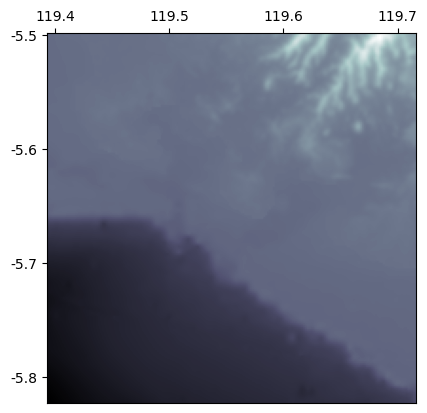

In [6]:
plt.figure()
plt.imshow(array_df, cmap='bone', extent=(left, right, bottom, top))
plt.xticks(ticks=[119.40, 119.50, 119.60, 119.70], labels=[119.40, 119.50, 119.60, 119.70])
plt.yticks(ticks=[-5.5, -5.6, -5.7, -5.8], labels=[-5.5, -5.6, -5.7, -5.8])
plt.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False);

<ipython-input-7-0bbf16915472>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticks(long_minor, minor=True)
<ipython-input-7-0bbf16915472>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_yticks(lat_minor, minor=True)


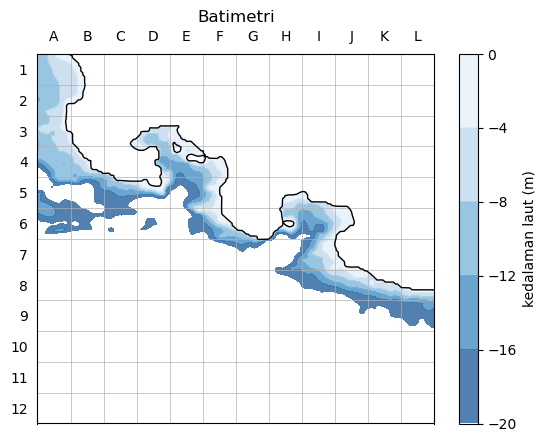

In [7]:
plt.figure()

CS = plt.contour(array_col, array_row, array_df, levels =[0], 
                 linewidths=1, colors='black')
CS1 = plt.contourf(array_col, array_row, array_df, levels=[-20, -16, -12, -8, -4, 0], 
                   cmap='Blues_r', alpha=0.7)
plt.grid(b=True, which='minor', lw=0.5)
plt.xticks()
cbar = plt.colorbar(CS1, label='kedalaman laut (m)')

plt.xticks(ticks=long, labels=col)
plt.axes().set_xticks(long_minor, minor=True)
plt.axes().set_yticks(lat_minor, minor=True)
plt.tick_params(which='minor', color='white')
plt.tick_params(axis='both', top=True, bottom=False, labeltop=True, labelbottom=False, color='white')
plt.yticks(ticks=lat, labels=row)
plt.title('Batimetri');

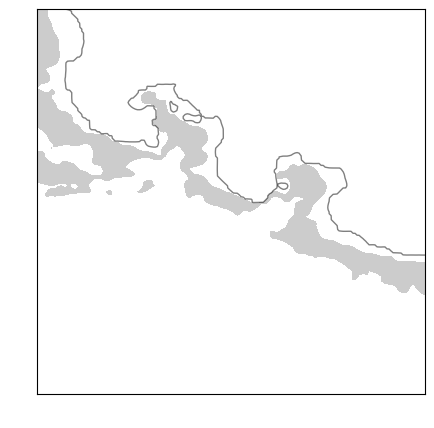

In [19]:
plt.figure(figsize=(5,5))

CS = plt.contour(array_col, array_row, array_df, levels =[0], 
                 linewidths=1, colors='black', alpha=0.5)
CS1 = plt.contourf(array_col, array_row, array_df, levels=[-20, -8],
                   colors='grey', alpha=0.4)
plt.tick_params(color='white')

plt.xticks(ticks=long, labels=col, color='white')
plt.yticks(ticks=lat, labels=row, color='white');

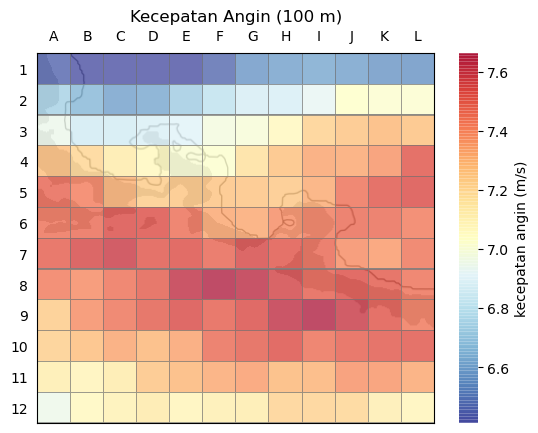

In [9]:
wind_data = pd.read_csv('csv/weibull_fitting.csv')
windspeed = wind_data['avg'].values.reshape(12,12)

wind_dataset = pd.DataFrame(windspeed, columns=col, index=row)
g = sns.heatmap(wind_dataset, cmap='RdYlBu_r', lw= 0.005, linecolor='grey', alpha=0.7,
               cbar_kws={'label':'kecepatan angin (m/s)'})
g.set_yticklabels(row, rotation=0)
g.set_xticklabels(col)
g.xaxis.tick_top() # x axis on top
g.tick_params(color="white")
g.xaxis.set_label_position('top')
sns.despine(left=False, bottom=False, top=False, right=False)


img=plt.imread("figure/background.png")
g.imshow(img, aspect = g.get_aspect(),
          extent = g.get_xlim() + g.get_ylim(),
          zorder = -1)

plt.title('Kecepatan Angin (100 m)');